# Predicción de Potabilidad del Agua

En esta ocasión se busca desarrollar un proceso de búsqueda de hiperparámetros para un modelo de Máquina de Soporte Vectorial (SVM).

Se sugiere fuertemente leer la documentación entregada en los artículos de los links.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno. La fecha límite de entrega es el día **22 de noviembre** y se realizará a través de Bloque Neón.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

Lectura de CSV y borrado de filas incompletas.

In [2]:
df = pd.read_csv('waterPotability/water_potability.csv').dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Gráfica de proporción de clases. A continuación puede observar una desproporción entre los datos, por lo que se está lidiando con un problema desbalanceado.

<AxesSubplot:ylabel='Potability'>

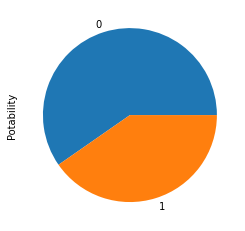

In [3]:
df['Potability'].value_counts().plot(kind='pie')

### Manejo de Datos Desbalanceados: Remuestreo

In [4]:
from sklearn.utils import resample
from sklearn.utils import shuffle

zero  = df[df['Potability']==0]   # clase 0
one = df[df['Potability']==1]  # clase 1

df_minority_upsampled = resample(one, replace = True, n_samples = 1200)
df = pd.concat([zero, df_minority_upsampled])

df = shuffle(df) # shuffling so that there is particular sequence

<AxesSubplot:ylabel='Potability'>

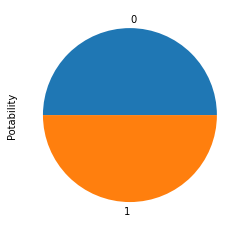

In [5]:
df['Potability'].value_counts().plot(kind='pie')

In [6]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [7]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Separación en Conjuntos de Validación/Prueba

Separe los datos (`X` y `y`) en conjuntos de:

- Entrenamiento (70%)
- Validación (15%)
- Prueba (15%)

Utilizando `train_test_split`.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=49)

## Parte 1: Evaluación de Modelos y GridSearch

Como recordará, en la tarea anterior se realizó un proceso de GridSearch y RandomizedSearch. En esta ocasión, nuevamente implementará este procedimiento para encontrar los mejores hiperparámetros.

Esta vez, se le solicita **desarrollar cada uno de los casos de forma manual y sin utilizar la librería SciKit-Learn (utilice ciclos `for`), obtener los mejores parámetros para los datos de VALIDACIÓN y graficar el histórico para los rangos del parámetro de regularización.**

- Kernel: Lineal, Polinomial (utilizar grados 1, 2, 3 y 4), Función Base Radial (RBF), Sigmoide.
- Parámetro de Regularización: Recorrido en escala logarítmica desde $10^{-3}$ hasta $10^{5}$.

Utilice la función `SVC` de `sklearn.svm` para definir y ajustar cada modelo.

### Búsqueda de Hiperparámetros con GridSearch

#### Caso 1: Kernel Lineal

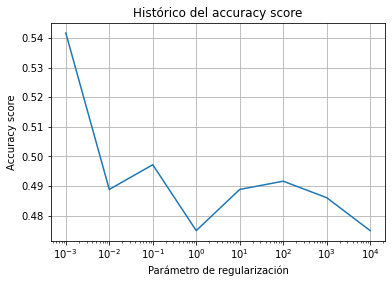

In [9]:
from sklearn import svm
from sklearn.metrics import accuracy_score

regularizacion = [10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10**4]

#regularizacion_lin = [10**-3, 10**-2, 10**-1, 1, 10, 100, 1000]

accuracies_lin = []
for regu in regularizacion:
    clasificador = svm.SVC(C=regu, kernel='linear')
    clasificador.fit(X_train, y_train)

    # Predicciones
    y_pred = clasificador.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    accuracies_lin.append(accuracy)


plt.plot(regularizacion, accuracies_lin)
plt.grid()
plt.title('Histórico del accuracy score')
plt.xlabel('Parámetro de regularización')
plt.ylabel('Accuracy score')
plt.xscale(value='log')

#### Caso 2: Kernel Polinomial

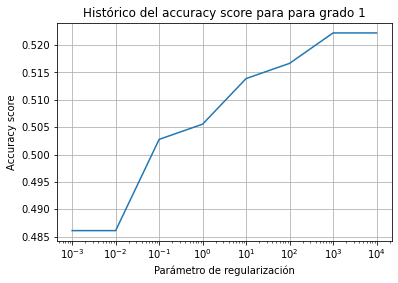

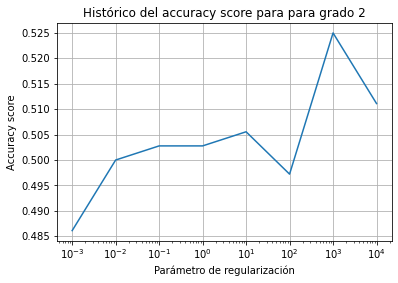

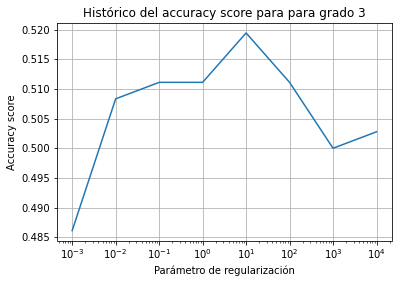

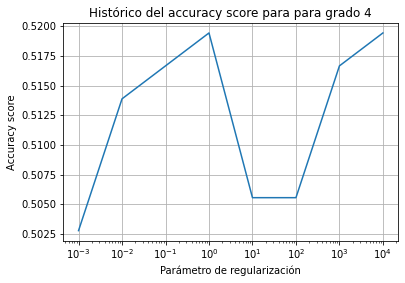

In [10]:
grados = [1, 2, 3, 4]

accuracies_poly = []
for grado in grados:
    for regu in regularizacion:
        clasif = svm.SVC(C=regu, kernel='poly', degree=grado)
        clasif.fit(X_train, y_train)

        # Predicciones
        y_pred = clasif.predict(X_valid)
        accuracy_poly = accuracy_score(y_valid, y_pred)

        accuracies_poly.append(accuracy_poly)

    plt.figure()
    plt.plot(regularizacion, accuracies_poly)
    plt.grid()
    plt.title(f'Histórico del accuracy score para para grado {grado}')
    plt.xlabel('Parámetro de regularización')
    plt.ylabel('Accuracy score')
    plt.xscale(value='log')

    accuracies_poly = []

#### Caso 3: Función Base Radial

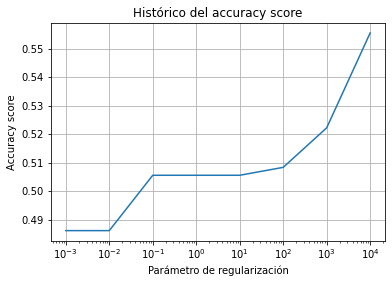

In [11]:
accuracies_radial = []
for regu in regularizacion:
    clasificador = svm.SVC(C=regu, kernel='rbf')
    clasificador.fit(X_train, y_train)

    # Predicciones
    y_pred = clasificador.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    accuracies_radial.append(accuracy)
    
plt.plot(regularizacion, accuracies_radial)
plt.grid()
plt.title('Histórico del accuracy score')
plt.xlabel('Parámetro de regularización')
plt.ylabel('Accuracy score')
plt.xscale(value='log')

#### Caso 4: Kernel Sigmoide

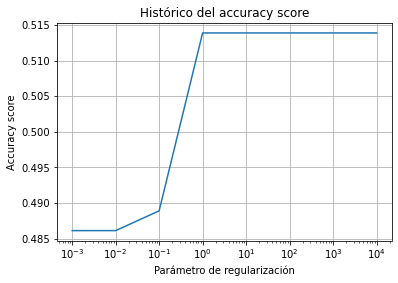

In [12]:
accuracies_sigmoid = []
for regu in regularizacion:
    clasificador = svm.SVC(C=regu, kernel='sigmoid')
    clasificador.fit(X_train, y_train)

    # Predicciones
    y_pred = clasificador.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    accuracies_sigmoid.append(accuracy)
    
plt.plot(regularizacion, accuracies_sigmoid)
plt.grid()
plt.title('Histórico del accuracy score')
plt.xlabel('Parámetro de regularización')
plt.ylabel('Accuracy score')
plt.xscale(value='log')

## Parte 2: Análisis de Resultados

Ahora, basado en los resultados anteriores, obtenga una evaluación final del mejor modelo y concluya sobre la pertinencia del mismo dentro del contexto de este problema.

In [13]:
from sklearn.metrics import classification_report

best_classifier = SVC(C=10**4, kernel='rbf') # Parámetros del clasificador #
best_classifier.fit(X_train, y_train)    

y_pred_rf = best_classifier.predict(X_test)

# Evaluación
print(f"Best classifier: {accuracy_score(y_test,y_pred_rf)}")
print(f"Reporte de Clasificación:\n{classification_report(y_test, y_pred_rf)}")

Best classifier: 0.5388888888888889
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.53      0.66      0.59       180
           1       0.55      0.42      0.48       180

    accuracy                           0.54       360
   macro avg       0.54      0.54      0.53       360
weighted avg       0.54      0.54      0.53       360



## Conclusiones

La selección de hiperparámetros que determinan el hiperplano que separa los datos se hallaron mediante SVM, el cual utiliza funciones matemáticas definidas como el kernel. El kernel es determinante en la selección de estos hiperparámetros, por lo cual debe ser escogido dependiendo del contexto del problema en el que se está trabajando. Recordemos que los mejores hiperparámetros son aquellos que definen el hiperplano tal que el márgen de clasificación sea el mayor, es decir, cuando la distancia entre los puntos y el hiperplano es más grande (mayor información [aquí](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)). Para este caso, se utilizaron cuatro tipos de kernels. En primer lugar, el Kernel Lineal se utiliza principalmente para datos que son linealmente separables. En segundo lugar, el Polinomial es una representación más generalizada del Kernel Lineal, y es comúnmente empleado en procesamiento de imágenes. En tercer lugar, tenemos el Kernel Base Radial, utilizado cuando no hay conocimiento previo de los datos. Finalmente, el Kernel Sigmoide es equivalente a un modelo de perceptrón de dos capas, por lo que se utiliza en la gran mayoría de los casos en redes neuronales (la información de los tipos de Kernels se muestra a continuación: [lineal y sigmoide](https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/), [polinomial](https://data-flair.training/blogs/svm-kernel-functions/), [radial](https://dataaspirant.com/svm-kernels/#t-1608054630730))

Por otro lado, se utiliza el parámetro de regularización, el cual determina que tanto se equivoca el clasificador. Por lo tanto, entre mayor sea este valor, la tasa de errores de clasificación será menor (explicado experimentalmente [aquí](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)).

Para determinar el mejor modelo, se utilizó la precisión por el contexto del problema, al igual que en la tarea anterior. Esto debido a que es bastante importante minimizar los falsos positivos para evitar casos donde la gente haga uso de agua no potable que fue determinada como potable. Teniendo en cuenta lo anterior, el modelo que presentó mayor precisión fue el del Kernel Base Radial con regularización de $10^4$. Se evidencia que el parámetro de regularización es el mayor, lo cual es congruente con lo explicado previamente. Era de esperarse que el kernel óptimo correspondiera a un modelo complejo, pues los datos con los que se están trabajando no son linealmente separables y aunque el kernel polinomial tuvo un grado de de exactitud levemente cercano al de base radial, no es lo suficientemente complejo para modelar los datos. Como las funciones de base radial son más complejas, tienen la capacidad de ajustarse mejor a datos que están muy esparcidos. 

Sin embargo, es claro que tratar de realizar clasificación de estos datos usando un modelo de SVM no es muy óptimo: el clasificador con los mejores parámetros encontrados tuvo un accuracy de aproximadamente 0.54, lo cual indica un amplio porcentaje de error. Aunque se trate de realizar la clasificación con diferentes kernels, es claro que el accuracy para ninguno de ellos superó el umbral de exactitud igual a 0.6, lo cual no es muy bueno, y un modelo de clasificación con redes neuronales puede ser más exacto para este problema específico de clasificación.  